# Participantes do Grupo 6


Josiel Pantaleão

Rodrigo Mendes

Matheus Fares

Mariana Dourado

# Importando as bibliotecas

In [1]:
!pip install -U pandas-profiling

In [2]:
import pandas as pd

In [26]:
import pandas as pd
import numpy as np
from scipy import stats
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pandas_profiling import ProfileReport

# Abrindo o dataset


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df_train = pd.read_csv('/content/drive/MyDrive/AMS/classificacao_binaria_train.csv',delimiter=";")
df_train.head(5)

,NR_SEQ_REQUISICAO,NR_SEQ_ITEM,DT_REQUISICAO,DS_TIPO_GUIA,DT_NASCIMENTO,NR_PRODUTO,DS_TIPO_PREST_SOLICITANTE,DS_CBO,DS_TIPO_CONSULTA,QT_TEMPO_DOENCA,...,CD_CID,DS_INDICACAO_CLINICA,DS_TIPO_ITEM,CD_ITEM,DS_ITEM,DS_CLASSE,DS_SUBGRUPO,DS_GRUPO,QT_SOLICITADA,DS_STATUS_ITEM
0,1506266,4178993,2459565,Guia de solicitac?o SP/SADT,2437002.0,1,CLINICA,Medico oncologista clinico,NaN,NaN,...,C90,Mieloma mult e neopl malig de plasmocitos,Procedimentos,60026251,TAXA DE SALA MANIPULAC?O QUIMIOTERAPICOS ? CAPELA,FORA DO CENTRO CIRURGICO,TAXA DE SALA,TAXAS,1,Autorizado
1,1586873,4433946,2459611,Guia de solicitac?o de prorrogac?o de internac?o,2428370.0,1,HOSPITAL,Medico em medicina intensiva,NaN,NaN,...,NaN,"Solicitac?o de prorrogac?o de 2 diarias, refer...",Procedimentos,20203012,ASSISTENCIA FISIATRICA RESPIRATORIA EM PACIENT...,REABILITAC?ES - SESS?ES,PROCEDIMENTOS CLINICOS HOSPITALARES,PROCED. CLINICOS,6,Autorizado
2,1556472,4335516,2459597,Guia de solicitac?o SP/SADT,2437266.0,1,CLINICA DE IMAGEM,Medico ginecologista e obstetra,NaN,NaN,...,NaN,PEDIDO MEDICO EM ANEXO,Procedimentos,40901300,"USG - ULTRASSONOGRAFIA - TRANSVAGINAL (UTERO, ...",ULTRA-SONOGRAFIA DIAGNOSTICA,ULTRA-SONOGRAFIA,PROCED. DIAGNOSTICOS E TERAPEUTICOS,1,Autorizado
3,943431,2331936,2459271,Guia de solicitac?o SP/SADT,2441608.0,1,CLINICA,Medico oftalmologista,NaN,NaN,...,H353,\nLAUDO OFTALMOLOGICO \n\n \nPaciente: Patrici...,Procedimentos,30307147,PCT-HM - TRATAMENTO OCULAR QUIMIOTERAPICO COM ...,CORPO VITREO,OLHOS,PROCED. CIRURGICOS E INVASIVOS,1,Negado
4,1107870,2865226,2459361,Guia de solicitac?o SP/SADT,2435597.0,1,PRESTADOR DE SERVICOS,Medico clinico,NaN,NaN,...,NaN,dor cronica.,Procedimentos,41101227,RM - RESSONANCIA MAGNETICA - COLUNA CERVICAL O...,RESSONANCIA MAGNETICA DIAGNOSTICA,RESSONANCIA MAGNETICA,PROCED. DIAGNOSTICOS E TERAPEUTICOS,2,Autorizado


## Analise geral dos dados

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412540 entries, 0 to 412539
Data columns (total 31 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   NR_SEQ_REQUISICAO          412540 non-null  int64  
 1   NR_SEQ_ITEM                412540 non-null  int64  
 2   DT_REQUISICAO              412540 non-null  int64  
 3   DS_TIPO_GUIA               412540 non-null  object 
 4   DT_NASCIMENTO              412529 non-null  float64
 5   NR_PRODUTO                 412540 non-null  int64  
 6   DS_TIPO_PREST_SOLICITANTE  412540 non-null  object 
 7   DS_CBO                     412540 non-null  object 
 8   DS_TIPO_CONSULTA           15689 non-null   object 
 9   QT_TEMPO_DOENCA            281 non-null     float64
 10  DS_UNIDADE_TEMPO_DOENCA    282 non-null     object 
 11  DS_TIPO_DOENCA             967 non-null     object 
 12  DS_INDICACAO_ACIDENTE      380490 non-null  object 
 13  DS_TIPO_SAIDA              0 

In [7]:
variaveis_categoricas = df_train.select_dtypes(include=object).columns
variaveis_numericas = df_train.select_dtypes(include=np.number).columns

print("As colunas contendos variáveis categóricas são:\n", variaveis_categoricas, "\n\nAs colunas contendos variáveis numéricas são:\n", variaveis_numericas)

As colunas contendos variáveis categóricas são:
 Index(['DS_TIPO_GUIA', 'DS_TIPO_PREST_SOLICITANTE', 'DS_CBO',
       'DS_TIPO_CONSULTA', 'DS_UNIDADE_TEMPO_DOENCA', 'DS_TIPO_DOENCA',
       'DS_INDICACAO_ACIDENTE', 'DS_TIPO_INTERNACAO', 'DS_REGIME_INTERNACAO',
       'DS_CARATER_ATENDIMENTO', 'DS_TIPO_ACOMODACAO', 'DS_TIPO_ATENDIMENTO',
       'CD_CID', 'DS_INDICACAO_CLINICA', 'DS_TIPO_ITEM', 'DS_ITEM',
       'DS_CLASSE', 'DS_SUBGRUPO', 'DS_GRUPO', 'DS_STATUS_ITEM'],
      dtype='object') 

As colunas contendos variáveis numéricas são:
 Index(['NR_SEQ_REQUISICAO', 'NR_SEQ_ITEM', 'DT_REQUISICAO', 'DT_NASCIMENTO',
       'NR_PRODUTO', 'QT_TEMPO_DOENCA', 'DS_TIPO_SAIDA', 'QT_DIA_SOLICITADO',
       'CD_GUIA_REFERENCIA', 'CD_ITEM', 'QT_SOLICITADA'],
      dtype='object')


In [8]:
df_train[variaveis_numericas].describe()

,NR_SEQ_REQUISICAO,NR_SEQ_ITEM,DT_REQUISICAO,DT_NASCIMENTO,NR_PRODUTO,QT_TEMPO_DOENCA,DS_TIPO_SAIDA,QT_DIA_SOLICITADO,CD_GUIA_REFERENCIA,CD_ITEM,QT_SOLICITADA
count,4.125400e+05,4.125400e+05,4.125400e+05,4.125290e+05,412540.0,281.000000,0.0,120685.000000,7.029800e+04,4.125400e+05,412540.000000
mean,1.151521e+06,2.626495e+06,2.459381e+06,2.439534e+06,1.0,8.960854,NaN,2.460372,1.179341e+06,5.946714e+07,59.127765
std,2.889745e+05,1.179561e+06,1.533197e+02,6.849753e+03,0.0,11.014045,NaN,3.703165,2.497937e+05,2.185481e+08,4056.078153
min,5.796250e+05,8.231270e+05,2.459075e+06,2.421816e+06,1.0,1.000000,NaN,0.000000,5.797030e+05,4.200000e+01,1.000000
25%,9.300360e+05,1.468307e+06,2.459264e+06,2.434627e+06,1.0,3.000000,NaN,1.000000,9.922550e+05,2.020305e+07,1.000000
50%,1.189158e+06,2.760746e+06,2.459402e+06,2.438884e+06,1.0,5.000000,NaN,1.000000,1.186608e+06,4.070601e+07,1.000000
75%,1.385720e+06,3.658920e+06,2.459506e+06,2.443453e+06,1.0,11.000000,NaN,3.000000,1.395000e+06,4.140148e+07,2.000000
max,1.614682e+06,4.525999e+06,2.459622e+06,2.459562e+06,1.0,92.000000,NaN,55.000000,1.613675e+06,3.000079e+09,600343.000000


In [9]:
df_train[variaveis_categoricas].describe()


,DS_TIPO_GUIA,DS_TIPO_PREST_SOLICITANTE,DS_CBO,DS_TIPO_CONSULTA,DS_UNIDADE_TEMPO_DOENCA,DS_TIPO_DOENCA,DS_INDICACAO_ACIDENTE,DS_TIPO_INTERNACAO,DS_REGIME_INTERNACAO,DS_CARATER_ATENDIMENTO,DS_TIPO_ACOMODACAO,DS_TIPO_ATENDIMENTO,CD_CID,DS_INDICACAO_CLINICA,DS_TIPO_ITEM,DS_ITEM,DS_CLASSE,DS_SUBGRUPO,DS_GRUPO,DS_STATUS_ITEM
count,412540,412540,412540,15689,282,967,380490,121928,121929,412540,121854,291251,177523,325070,412540,412540,412540,412540,412540,412540
unique,3,12,66,4,3,2,4,6,3,2,8,13,1902,76280,2,7685,501,74,9,3
top,Guia de solicitac?o SP/SADT,CLINICA,Medico clinico,Primeira consulta,Dias,Aguda,N?o acidente,Clinica,Hospitalar,Eletiva,Enfermaria,Exames,Z00,EM ANEXO,Procedimentos,ENFERMARIA,PROCEDIMENTOS,MEDICINA LABORATORIAL,PROCED. DIAGNOSTICOS E TERAPEUTICOS,Autorizado
freq,290591,162396,110826,8478,105,860,319117,58383,115394,286714,82269,189501,15377,7856,335127,8170,43439,62140,196480,278610


##Identificação e tratamendo de variáveis categóricas

In [10]:
df_train[r'DT_NASCIMENTO'].plot.hist()
plt.show()

In [11]:
df_train[variaveis_numericas].boxplot()
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


In [12]:
covariancia = df_train.cov()
covariancia

,NR_SEQ_REQUISICAO,NR_SEQ_ITEM,DT_REQUISICAO,DT_NASCIMENTO,NR_PRODUTO,QT_TEMPO_DOENCA,DS_TIPO_SAIDA,QT_DIA_SOLICITADO,CD_GUIA_REFERENCIA,CD_ITEM,QT_SOLICITADA
NR_SEQ_REQUISICAO,8.350625e+10,2.198297e+11,4.429853e+07,-9.814217e+07,0.0,9.946441e+05,NaN,-1.974134e+04,5.799664e+10,1.033568e+12,3.485632e+05
NR_SEQ_ITEM,2.198297e+11,1.391365e+12,1.166202e+08,2.104799e+08,0.0,2.171141e+06,NaN,6.301037e+04,1.596343e+11,-2.947608e+13,-6.451957e+06
DT_REQUISICAO,4.429853e+07,1.166202e+08,2.350694e+04,-5.202080e+04,0.0,5.429492e+02,NaN,-9.720517e+00,3.047463e+07,5.494674e+08,1.997799e+02
DT_NASCIMENTO,-9.814217e+07,2.104799e+08,-5.202080e+04,4.691912e+07,0.0,-1.014247e+04,NaN,-2.847521e+03,-9.893611e+07,-4.673252e+10,1.250006e+05
NR_PRODUTO,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
QT_TEMPO_DOENCA,9.946441e+05,2.171141e+06,5.429492e+02,-1.014247e+04,0.0,1.213092e+02,NaN,7.276216e+01,-2.037133e+04,1.338072e+08,5.236613e+02
DS_TIPO_SAIDA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
QT_DIA_SOLICITADO,-1.974134e+04,6.301037e+04,-9.720517e+00,-2.847521e+03,0.0,7.276216e+01,NaN,1.371343e+01,-8.789232e+04,9.556364e+06,2.600703e+01
CD_GUIA_REFERENCIA,5.799664e+10,1.596343e+11,3.047463e+07,-9.893611e+07,0.0,-2.037133e+04,NaN,-8.789232e+04,6.239688e+10,-1.098621e+12,-1.718676e+06
CD_ITEM,1.033568e+12,-2.947608e+13,5.494674e+08,-4.673252e+10,0.0,1.338072e+08,NaN,9.556364e+06,-1.098621e+12,4.776327e+16,3.585695e+09


## Lidando com valores nulos - By: Mariana


In [13]:
# Quantos valores nulos tem em cada feature?
for i in range(0, len(df_train.columns)):
  print("Na feature '", df_train.columns[i],
        "' temos ", df_train[df_train.columns[i]].isnull().sum(),
        " valores nulos de um total de " ,
        df_train[df_train.columns[i]].value_counts(dropna=False).sum(),
        "amostras, isto é, ",
        "{:.2f}".format((df_train[df_train.columns[i]].isnull().sum()/df_train[df_train.columns[i]].value_counts(dropna=False).sum())*100), "%")

Na feature ' NR_SEQ_REQUISICAO ' temos  0  valores nulos de um total de  412540 amostras, isto é,  0.00 %
Na feature ' NR_SEQ_ITEM ' temos  0  valores nulos de um total de  412540 amostras, isto é,  0.00 %
Na feature ' DT_REQUISICAO ' temos  0  valores nulos de um total de  412540 amostras, isto é,  0.00 %
Na feature ' DS_TIPO_GUIA ' temos  0  valores nulos de um total de  412540 amostras, isto é,  0.00 %
Na feature ' DT_NASCIMENTO ' temos  11  valores nulos de um total de  412540 amostras, isto é,  0.00 %
Na feature ' NR_PRODUTO ' temos  0  valores nulos de um total de  412540 amostras, isto é,  0.00 %
Na feature ' DS_TIPO_PREST_SOLICITANTE ' temos  0  valores nulos de um total de  412540 amostras, isto é,  0.00 %
Na feature ' DS_CBO ' temos  0  valores nulos de um total de  412540 amostras, isto é,  0.00 %
Na feature ' DS_TIPO_CONSULTA ' temos  396851  valores nulos de um total de  412540 amostras, isto é,  96.20 %
Na feature ' QT_TEMPO_DOENCA ' temos  412259  valores nulos de um tot

Features com valores nulos acima de 90% serão descartas. No caso:


In [14]:
porcentagem_corte_nulo = 90
drop_columns = []

print("As seguintes features seguidas da porcentagem de valores nulos nas amostras serão eliminadas: ")
for i in range(len(df_train.columns)):
  if(((df_train[df_train.columns[i]].isnull().sum()/df_train[df_train.columns[i]].value_counts(dropna=False).sum())*100) > porcentagem_corte_nulo):
    print(df_train.columns[i],
          " (", "{:.2f}".format((df_train[df_train.columns[i]].isnull().sum()/df_train[df_train.columns[i]].value_counts(dropna=False).sum())*100), "% )")
    drop_columns.append(df_train.columns[i])
df_train.drop(drop_columns, axis=1, inplace=True)
print("\nColunas excluídas com sucesso.")

As seguintes features seguidas da porcentagem de valores nulos nas amostras serão eliminadas: 
DS_TIPO_CONSULTA  ( 96.20 % )
QT_TEMPO_DOENCA  ( 99.93 % )
DS_UNIDADE_TEMPO_DOENCA  ( 99.93 % )
DS_TIPO_DOENCA  ( 99.77 % )
DS_TIPO_SAIDA  ( 100.00 % )

Colunas excluídas com sucesso.


Verificar as informações do dataset:

In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412540 entries, 0 to 412539
Data columns (total 26 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   NR_SEQ_REQUISICAO          412540 non-null  int64  
 1   NR_SEQ_ITEM                412540 non-null  int64  
 2   DT_REQUISICAO              412540 non-null  int64  
 3   DS_TIPO_GUIA               412540 non-null  object 
 4   DT_NASCIMENTO              412529 non-null  float64
 5   NR_PRODUTO                 412540 non-null  int64  
 6   DS_TIPO_PREST_SOLICITANTE  412540 non-null  object 
 7   DS_CBO                     412540 non-null  object 
 8   DS_INDICACAO_ACIDENTE      380490 non-null  object 
 9   DS_TIPO_INTERNACAO         121928 non-null  object 
 10  DS_REGIME_INTERNACAO       121929 non-null  object 
 11  DS_CARATER_ATENDIMENTO     412540 non-null  object 
 12  DS_TIPO_ACOMODACAO         121854 non-null  object 
 13  QT_DIA_SOLICITADO          12

Vamos ver a correlação novamente e partir para a próxima seção

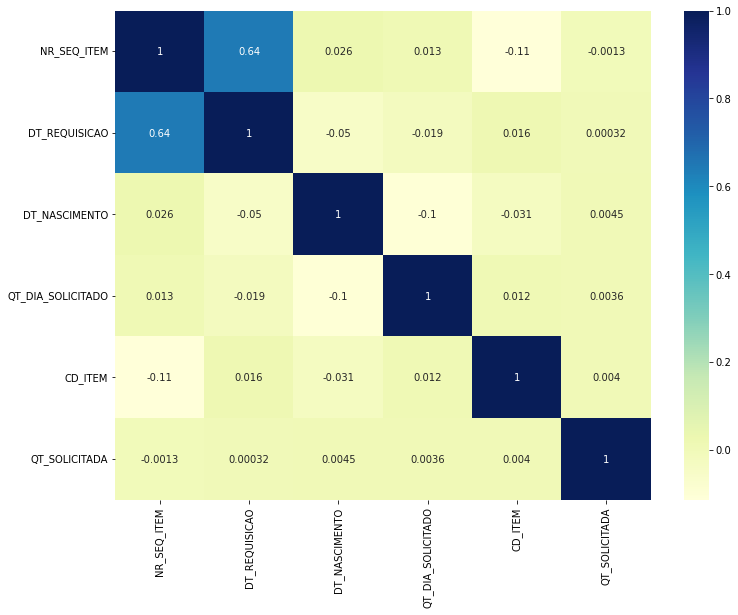

In [27]:
df_train.corr()
plt.figure(figsize=(12,9))
sns.heatmap(df_train.corr(), annot=True, cmap='YlGnBu')

## Descarte de features redundantes

A matriz de correlação printada acima informa que os coeficientes da coluna `'NR_PRODUTO'` são inválidos. Vamos ver o por quê, mediante o print dos seus valores únicos:

In [17]:
df_train["NR_PRODUTO"].value_counts(dropna=False)

1    412540
Name: NR_PRODUTO, dtype: int64

Percebe-se que todas as linhas da coluna `'NR_PRODUTO'` estão preenchidas com o valor 1. Logo, essa feature não irá adicionar nada em nosso modelo. Dessa forma, será feita o descarte da mesma:


In [18]:
df_train.drop(["NR_PRODUTO"], inplace=True, axis=1)

Vamos ver a correlação novamente:

In [19]:
df_train.corr()
plt.figure(figsize=(12,9))
sns.heatmap(df_train.corr(), annot=True, cmap='YlGnBu')

Vamos enxergar melhor a relação entre `"CD_GUIA_REFERENCIA"`, `"DT_REQUISICAO"` e `"NR_SEQ_REQUISICAO"`.

In [20]:
sns.pairplot(df_train.drop(df_train.columns.difference(["CD_GUIA_REFERENCIA","DT_REQUISICAO", "NR_SEQ_REQUISICAO"]), axis=1, inplace=False))

A correlação entre elas é suficientemente alta (muito próximo de 1) para que pelo menos 2 sejam descartadas, visando a diminuição da dimensionalidade do problema.
Sabemos que `"CD_GUIA_REFERENCIA"` tem cerca de 83% dos valores nulos. Por essa razão, tal feature será descartada.

In [22]:
df_train.drop(["CD_GUIA_REFERENCIA"], inplace=True, axis=1)

Agora falta escolher entre as features `"DT_REQUISICAO"` e `"NR_SEQ_REQUISICAO"` para ser descartada. Visto que nenhuma contêm valores nulos, não há como descartar com base nestes. Então, foi escolhida a feature `"NR_SEQ_REQUISICAO"`, por conter menor correlação com `"QT_DIA_SOLICITACAO"`.

In [25]:
df_train.drop(["NR_SEQ_REQUISICAO"], inplace=True, axis=1)

Vamos ver a correlação novamente e partir para a próxima seção:

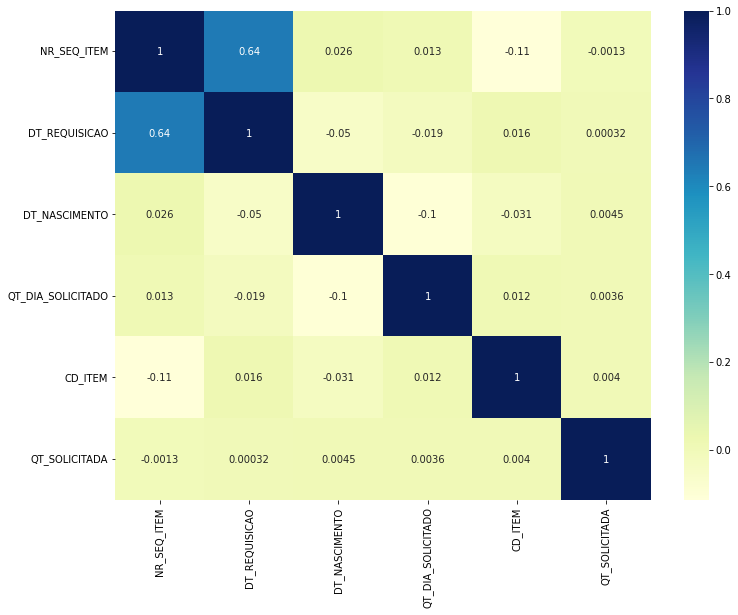

In [28]:
df_train.corr()
plt.figure(figsize=(12,9))
sns.heatmap(df_train.corr(), annot=True, cmap='YlGnBu')

##Lidando com variáveis categóricas

In [30]:
"""
Na feature ' DS_REGIME_INTERNACAO ' temos  290611  valores nulos de um total de  412540 amostras, isto é,  70.44 %
Na feature ' DS_TIPO_ACOMODACAO ' temos  290686  valores nulos de um total de  412540 amostras, isto é,  70.46 %
Na feature ' QT_DIA_SOLICITADO ' temos  291855  valores nulos de um total de  412540 amostras, isto é,  70.75 %
"""
df_train["DS_REGIME_INTERNACAO"].value_counts()

Hospitalar      115394
Hospital-dia      5909
Domiciliar         626
Name: DS_REGIME_INTERNACAO, dtype: int64

In [31]:
df_train["DS_TIPO_ACOMODACAO"].value_counts()

Enfermaria                                 82269
UTI Adulto                                 22698
UTI                                        12963
Hospital Dia                                2124
UTI Neo-Natal                                815
Home Care                                    662
Apartamento                                  296
TSI - Unidade de Terapia semi-Intensiva       27
Name: DS_TIPO_ACOMODACAO, dtype: int64

In [32]:
df_train["QT_DIA_SOLICITADO"].value_counts()

1.0     56024
0.0     16902
2.0     15550
3.0     10056
5.0      6154
4.0      4512
6.0      2113
10.0     1779
7.0      1701
8.0      1006
15.0      893
9.0       710
11.0      477
14.0      412
30.0      387
12.0      372
13.0      271
31.0      235
18.0      222
16.0      203
19.0      156
17.0      108
20.0       95
28.0       82
21.0       60
23.0       54
22.0       50
25.0       33
34.0       19
24.0       18
26.0       17
29.0        5
35.0        3
47.0        3
55.0        2
27.0        1
Name: QT_DIA_SOLICITADO, dtype: int64

In [ ]:
""" Pode apagar?

# Fiz um dataframe novo só com os valores nulos para a comparação
new_data = df_train.dropna(axis = 0, how ='any')
  
# Comparei o tamanho dos dados
print("Tamanho do original:", len(df_train), "\nNovo tamanho:", 
       len(new_data), "\nNúmero de linhas retiradas com ao menos 1 NA : ",
       (len(df_train)-len(new_data)))

#detecta todas as colunas que possuem pelo menos um valor nulo.
df_train.isna().any()

#O código informa a quantidade de valores não nulos que a coluna possui.
df_train.count()

"""

## Detalhamento dos dados

In [ ]:
profile = ProfileReport(df_train, title='Profiling Diabets',html={'style':{'full_width':True}})
profile.to_notebook_iframe()

In [ ]:
print(df_train['DS_STATUS_ITEM'].value_counts())

# cria um gráfico de barras com a frequência de cada classe
sns.countplot(x="DS_STATUS_ITEM", data=df_train)
plt.show()

#Mudar os parcialmente autorizados para autorizados

In [ ]:
for atributo in df_train[variaveis_numericas[1:]]:
    sns.boxplot(x="DS_STATUS_ITEM", y=atributo, data=df_train, whis=1.5)
    plt.show()